In [476]:
import numpy as np
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
from test_fonts import *
from NeuralNetwork import  *
from time import perf_counter
from Utils import create_noise

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading Dataset

In [659]:
fonts = get_all_fonts(2,True)
font_count = len(fonts)

In [660]:
beta = 0.5

sigmoid = lambda e: 1 / (1 + np.exp(-e * 2 * beta))
sigmoid_derived = lambda e: 2 * beta * sigmoid(e) * (1 - sigmoid(e))

tanh = lambda e: math.tanh(e)
tanh_derived = lambda  e: 1- math.tanh(e)**2



def activation(e):
    return tanh(e)

def derivative(e):
    return tanh_derived(e)

In [661]:
nn = NNBuilder\
        .with_input(7*5)\
        .with_hidden_layer(30,activation,derivative)\
        .with_hidden_layer(20,activation,derivative)\
        .with_hidden_layer(10,activation,derivative)\
        .with_hidden_layer(5,activation,derivative)\
        .with_hidden_layer(10,activation,derivative)\
        .with_hidden_layer(20,activation,derivative)\
        .with_hidden_layer(30,activation,derivative)\
        .with_output_layer(7*5,activation,derivative)

true fonts:
None


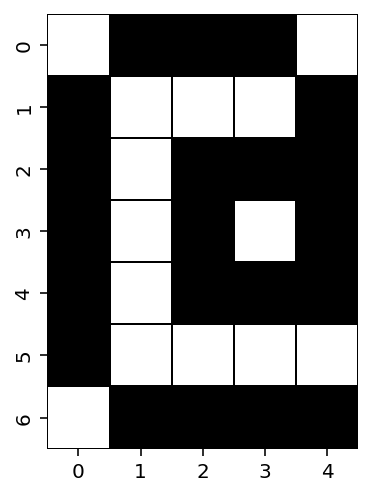

In [662]:
from copy import deepcopy

training = np.array(fonts[:5])
# mutate_training = deepcopy(training)
print('true fonts:')
print(print_character(training[0].reshape(7,5)))

#########
[array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1]), array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]), array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1]), array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]), array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1]), array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]), array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]), array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]), array([0, 1, 1, 1, 0,

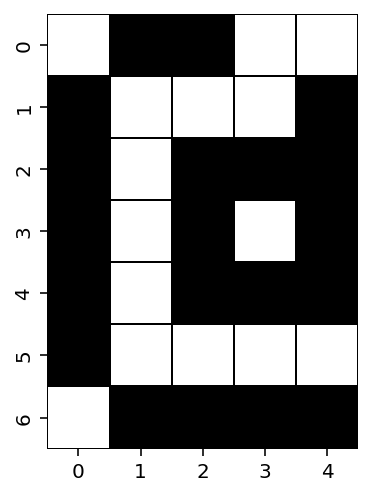

In [663]:

print('#########')
# pr = 0.9
# for j in range(0,len(mutate_training)):
#     for i in range(0,len(mutate_training[j])):
#         noise = np.random.uniform(0,1)
#         r = np.random.uniform(0,1)
#         print(noise)
#         print(f'Before i:{i} font[i]:{mutate_training[j][i]}')
#         mutate_training[j][i] += noise
#         print(f'After i:{i} font[i]:{mutate_training[j][i]}')
data = []
mutants = []
for i in range (0,10):
    mutants.extend(create_noise(training,0.02))
    data.extend(training)
print(mutants)
print(print_character(mutants[0].reshape(7,5)))


None


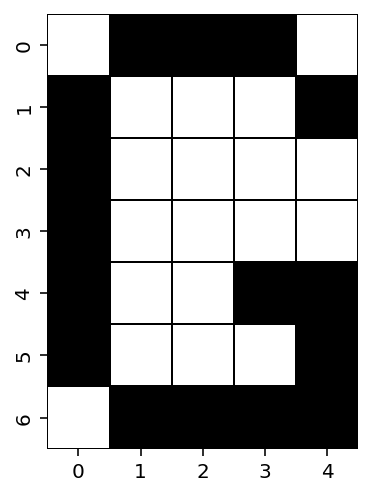

In [664]:
print(print_character(training[2].reshape(7,5)))

None


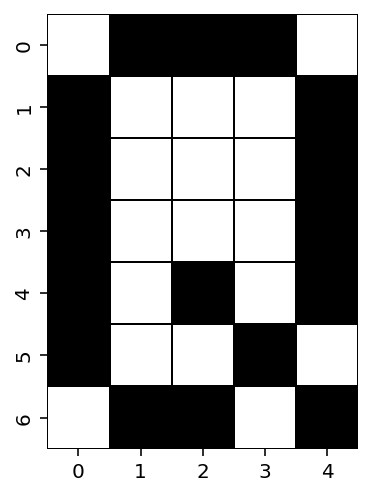

In [665]:
print(print_character(mutants[4].reshape(7,5)))

In [666]:
t0 = perf_counter()
training_errors, ws = nn.train_on_dataset(mutants, data, 20)
tf = perf_counter()
print(training_errors)
print(f'execution time: {tf-t0} s')

0.41799729536472646
execution time: 2932.905353957998 s


In [765]:
mutate_training = create_noise(training,0.02)

None


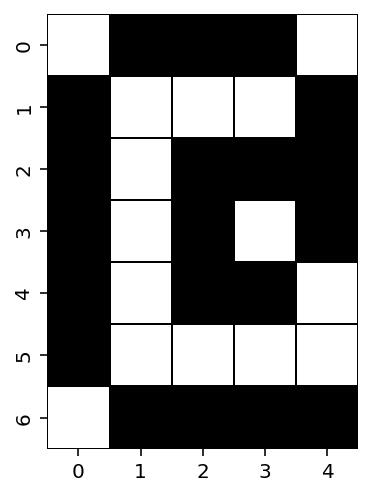

In [766]:
aa = training[2]
am = mutate_training[0]
value = nn.feed_forward(am)
print(print_character(am.reshape(7,5)))

None


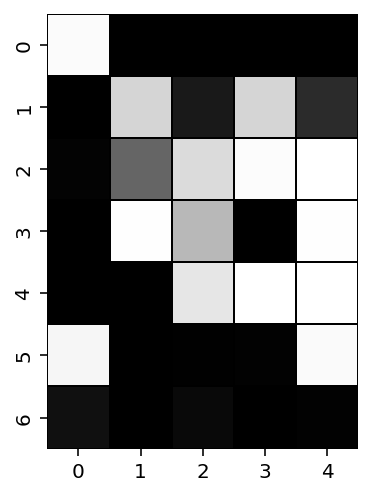

In [767]:
print(print_character(value.reshape(7,5)))

In [127]:
errors = []
for i in range(20):
    print(f'\n {i}:')
    nn = NNBuilder\
        .with_input(7*5)\
        .with_hidden_layer(20,activation,derivative)\
        .with_hidden_layer(10,activation,derivative)\
        .with_hidden_layer(2,activation,derivative)\
        .with_hidden_layer(10,activation,derivative)\
        .with_hidden_layer(20,activation,derivative)\
        .with_output_layer(7*5,activation,derivative)
    np.random.shuffle(fonts)
    idx = math.floor(font_count * 0.5)
    idx=5
    training, test = np.array(fonts[:idx]), np.array(fonts[idx:])
    mutate_training = create_noise(training,0.1)

    t0 = perf_counter()
    training_errors, ws = nn.train_on_dataset(mutate_training, training, 10)
    tf = perf_counter()
    print(f'execution time: {tf-t0} s')
    print(f"training error: {training_errors}")
    errors.append(training_errors)


 0:
execution time: 56.63029449999976 s
training error: 0.09901865907086098

 1:
execution time: 53.966569041000184 s
training error: 0.19348075599630715

 2:
execution time: 53.571693083000355 s
training error: 0.11483140102670542

 3:
execution time: 57.18984712499969 s
training error: 0.17625849423567094

 4:
execution time: 53.49495987499995 s
training error: 0.11426747933708514

 5:
execution time: 55.88063337499989 s
training error: 0.03017355793703716

 6:
execution time: 58.045499167000344 s
training error: 0.14015109266377648

 7:
execution time: 55.78682024999944 s
training error: 0.0258419333375745

 8:
execution time: 57.603972040999906 s
training error: 0.1181469459848495

 9:
execution time: 57.932862583000315 s
training error: 0.13713913807140768

 10:
execution time: 53.59661654199954 s
training error: 0.15601026283256866

 11:
execution time: 55.90770274999977 s
training error: 0.24770290954783977

 12:
execution time: 56.97953612499987 s
training error: 0.06036669721

In [128]:
print(f'errors: {errors}')
print(f'avg: {np.average(errors)}')
print(f'min: {np.min(errors)}')
print(f'max: {np.max(errors)}')

errors: [0.09901865907086098, 0.19348075599630715, 0.11483140102670542, 0.17625849423567094, 0.11426747933708514, 0.03017355793703716, 0.14015109266377648, 0.0258419333375745, 0.1181469459848495, 0.13713913807140768, 0.15601026283256866, 0.24770290954783977, 0.06036669721164193, 0.06929944172802682, 0.08640558215767867, 0.09792962753040435, 0.08159379468540982, 0.10491820471252246, 0.0734992470731211, 0.14507031738592743]
avg: 0.11360527712632078
min: 0.0258419333375745
max: 0.24770290954783977
